In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
target=df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
inputs=df.drop(['Survived'],axis='columns')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:

inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
len(X_train)
len(X_test)
from sklearn import tree
model = tree.DecisionTreeClassifier()
model=model.fit(X_train,y_train)

[Text(0.4655389981995885, 0.975, 'X[1] <= 1.5\ngini = 0.475\nsamples = 712\nvalue = [436, 276]'),
 Text(0.17439075360082304, 0.925, 'X[2] <= 3.5\ngini = 0.307\nsamples = 464\nvalue = [376, 88]'),
 Text(0.030864197530864196, 0.875, 'X[0] <= 2.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.02263374485596708, 0.825, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.03909465020576132, 0.825, 'X[3] <= 22.512\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.030864197530864196, 0.775, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.047325102880658436, 0.775, 'X[2] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.03909465020576132, 0.725, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05555555555555555, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3179173096707819, 0.875, 'X[0] <= 1.5\ngini = 0.281\nsamples = 449\nvalue = [373, 76]'),
 Text(0.14300411522633744, 0.825, 'X[3] <= 26.144\ngini = 0.461\nsamples = 97\nvalue = [62, 35]'),
 Text(0.1347

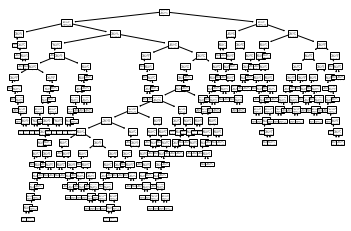

In [ ]:
tree.plot_tree(model)

In [ ]:
model.score(X_test,y_test)

0.8044692737430168

In [ ]:
model.predict([[1,2,38,71]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])